In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [2]:
df = pd.read_csv(r'C:\Users\ASUS\Downloads\aapl.us.txt',sep=",")
df[0:10]

,Date,Open,High,Low,Close,Volume,OpenInt
0,1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,0
1,1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,0
2,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,0
3,1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,0
4,1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,0
5,1984-09-14,0.44052,0.45589,0.44052,0.44566,68847968,0
6,1984-09-17,0.45718,0.46357,0.45718,0.45718,53755262,0
7,1984-09-18,0.45718,0.46103,0.44052,0.44052,27136886,0
8,1984-09-19,0.44052,0.44566,0.43157,0.43157,29641922,0
9,1984-09-20,0.43286,0.43668,0.43286,0.43286,18453585,0


In [3]:
# Get the number of trading days 
df.shape

(8364, 7)

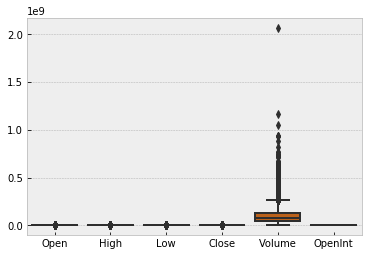

In [4]:
sns.boxplot(data=df)

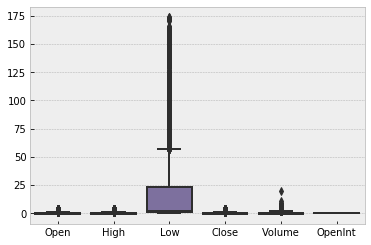

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
d=df.copy()
df["Open"]=scaler.fit_transform(df[["Open"]].values)
df["High"]=scaler.fit_transform(df[["High"]].values)
df["Close"]=scaler.fit_transform(df[["Close"]].values)
df["Volume"]=scaler.fit_transform(df[["Volume"]].values)
df["OpenInt"]=scaler.fit_transform(df[["OpenInt"]].values)
sns.boxplot(data=df)

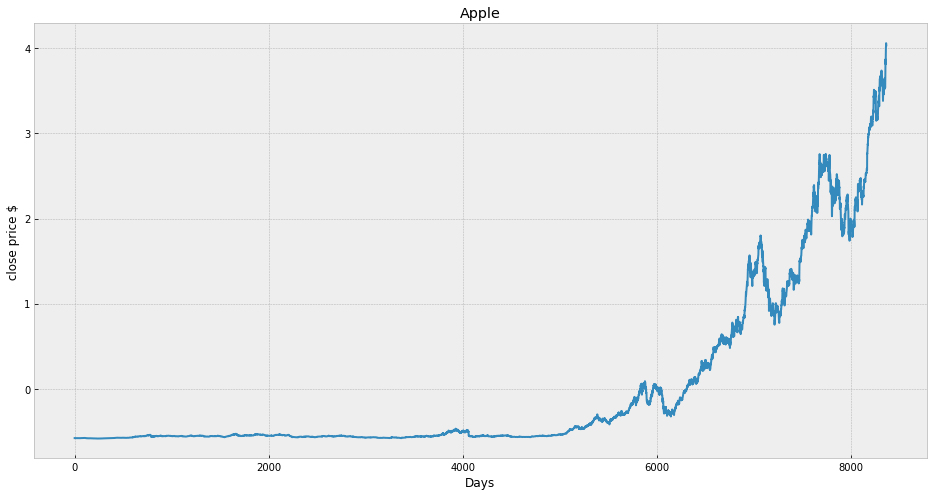

In [6]:
# Visulize the close price data 
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel(' close price $ ')
plt.plot(df['Close'])
plt.show()

In [7]:
# Create a variable to predict 'x' days out into the future
future_days = 25

# Create a new column ( target ) shifted by 'x' units or days
df['prediction']= df[['Close']].shift(-future_days)
df.tail(4)

,Date,Open,High,Low,Close,Volume,OpenInt,prediction
8360,2017-11-07,3.998969,3.994542,173.29,4.022513,-0.827581,0.0,NaN
8361,2017-11-08,4.018566,4.023447,173.71,4.060381,-0.827316,0.0,NaN
8362,2017-11-09,4.030483,4.019506,172.52,4.050848,-0.776162,0.0,NaN
8363,2017-11-10,4.047167,4.017404,174.27,4.035489,-0.820478,0.0,NaN


In [8]:
# Create the feature data set 'x' and convert it to a numpy array and remove the last 'x'rows or days
X = np.array (df.drop(['prediction','Date'], 1))[:-future_days]
print(X)

[[ -0.57891439  -0.57986024   0.41874     -0.57880979  -0.8397083
    0.        ]
 [ -0.57891439  -0.57996167   0.41366     -0.57887706  -0.89202547
    0.        ]
 [ -0.57888049  -0.57965895   0.42516     -0.57867368  -0.64565737
    0.        ]
 ...
 [  3.46376282   3.43746054 151.91         3.45978097  -0.87022543
    0.        ]
 [  3.47832806   3.47871612 153.5          3.51009582  -0.85861423
    0.        ]
 [  3.49898421   3.48002999 154.01         3.50771249  -0.89780617
    0.        ]]


In [9]:
# Create the target data set (Y) and convert it to a numpy array and get all of the target values except the last days\rows
Y = np.array(df['prediction'])[:-future_days]
print(Y)

[-0.58043761 -0.57989527 -0.57992837 ...  4.06038138  4.05084804
  4.03548877]


In [10]:
# Split the data into 75% training and 25% testing
x_train, x_test, y_train, y_test= train_test_split(X,Y, test_size=0.25)

In [11]:
# Create the models
#create the decision tree regressor model
tree= DecisionTreeRegressor().fit(x_train, y_train)

# Create the linear regression model
Lr= LinearRegression().fit(x_train, y_train)

In [12]:
# Get the last 'x' rows of the feature data set 
x_future= df.drop(['prediction','Date'], 1)[:-future_days]
x_future= x_future.tail(future_days)
x_future= np.array(x_future)
x_future

array([[  3.75851024,   3.72756347, 163.04      ,   3.73863116,
         -0.90598956,   0.        ],
       [  3.73070388,   3.70943204, 159.98      ,   3.68672742,
         -0.77537333,   0.        ],
       [  3.70342717,   3.67658524, 159.95      ,   3.68222557,
         -0.85510873,   0.        ],
       [  3.68700817,   3.65687716, 159.79      ,   3.66501259,
         -0.85212934,   0.        ],
       [  3.65443501,   3.62823475, 157.96      ,   3.59563107,
         -0.78628399,   0.        ],
       [  3.64516622,   3.65188445, 159.32      ,   3.67136815,
         -0.75505315,   0.        ],
       [  3.70077894,   3.70181158, 158.2       ,   3.65441999,
         -0.35005759,   0.        ],
       [  3.62848241,   3.59722737, 157.34      ,   3.62264219,
         -0.62017964,   0.        ],
       [  3.60517803,   3.582512  , 157.52      ,   3.58636254,
         -0.83462648,   0.        ],
       [  3.59140726,   3.62350481, 157.43      ,   3.62873294,
         -0.57996235,   0. 

In [13]:
# Show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()

# show the model linear regression prediction
lr_prediction = Lr.predict(x_future)
print(lr_prediction)

[3.5220125  3.51009582 3.52624954 3.52624954 3.55246622 3.62873294
 3.64435702 3.62555516 3.52571991 3.53286991 3.53075139 3.55537919
 3.53710695 3.24289749 3.71241448 3.80907195 3.87024422 3.81357381
 3.84588124 3.96160539 4.00794801 4.02251284 4.06038138 4.05084804
 4.03548877]

[3.8288874  3.74796284 3.75537996 3.7453582  3.67124562 3.75691603
 3.70291774 3.69542539 3.67634979 3.71099191 3.67164831 3.68663466
 3.57315007 3.52016912 3.49289097 3.45922964 3.53603376 3.57040805
 3.53649594 3.55056891 3.5452008  3.57889756 3.54046435 3.59911663
 3.5984592 ]


C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


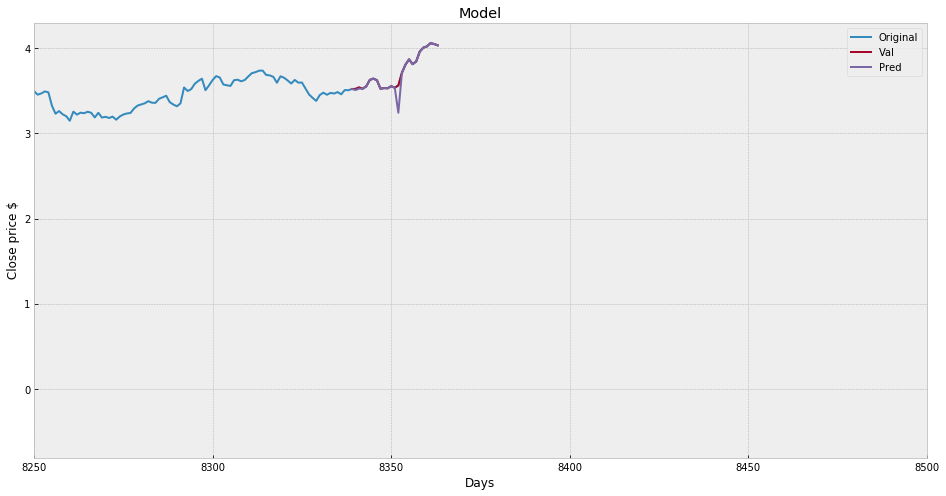

In [14]:
# Visualize the data 
# Decision tree model

predictions= tree_prediction
valid = df[X.shape[0]:]
valid['prediction']= predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel(' Close price $')
plt.plot(df['Close'])
plt.plot(valid[['Close','prediction']])
plt.legend(['Original','Val','Pred'])
plt.xlim(8250,8500)

plt.show()

C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


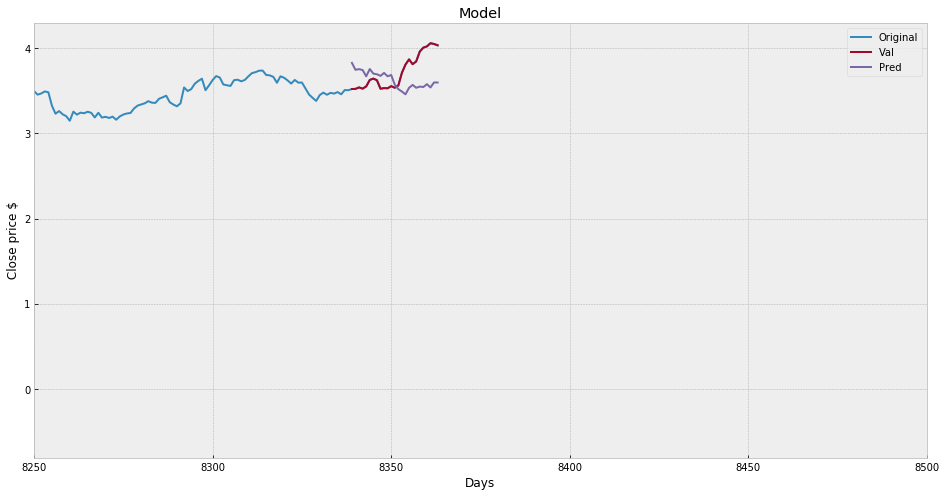

In [15]:
# Linear regression model 

predictions= lr_prediction
valid = df[X.shape[0]:]
valid['prediction']= predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel(' Close price $')
plt.plot(df['Close'])
plt.plot(valid[['Close','prediction']])
plt.legend(['Original','Val','Pred'])
plt.xlim(8250,8500)
plt.show()

In [16]:
# The decision tree is the best since it's prediction are accurate than the linear model. 